## Lab: Advanced Data Augmentation with Keras 


You will learn to implement and experiment with various data augmentation techniques using Keras in this lab. 

#### Learning objectives 

- Implement various data augmentation techniques using Keras 
- Implement feature-wise and sample-wise normalization on the data set. 
- Define and apply a custom augmentation function that adds random noise to images. 
- Display the augmented images to understand the effect of different augmentation techniques.  


#### Step-by-step instructions 

##### Step 1: Setup the environment 

First, you need to import the necessary libraries and load the data set as follows: 


Reason for being yanked: The Windows wheels, under some conditions, caused segfaults in unrelated user code.  Due to this we deleted the Windows wheels to prevent these segfaults, however this caused greater disruption as pip then began to try (and fail) to build 3.9.1 from the sdist on Windows which impacted far more users.  Yanking the whole release is the only tool available to eliminate these failures without changes to on the user side.  The sdist, OSX wheel, and manylinux wheels are all functional and there are no critical bugs in the release.   Downstream packagers should not yank their builds of Matplotlib 3.9.1.  See https://github.com/matplotlib/matplotlib/issues/28551 for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 103.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 134.9 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 144.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 90.

2025-09-28 14:05:40.710447: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-09-28 14:05:40.711412: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 14:05:40.715460: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-28 14:05:40.727358: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-28 14:05:40.750144: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


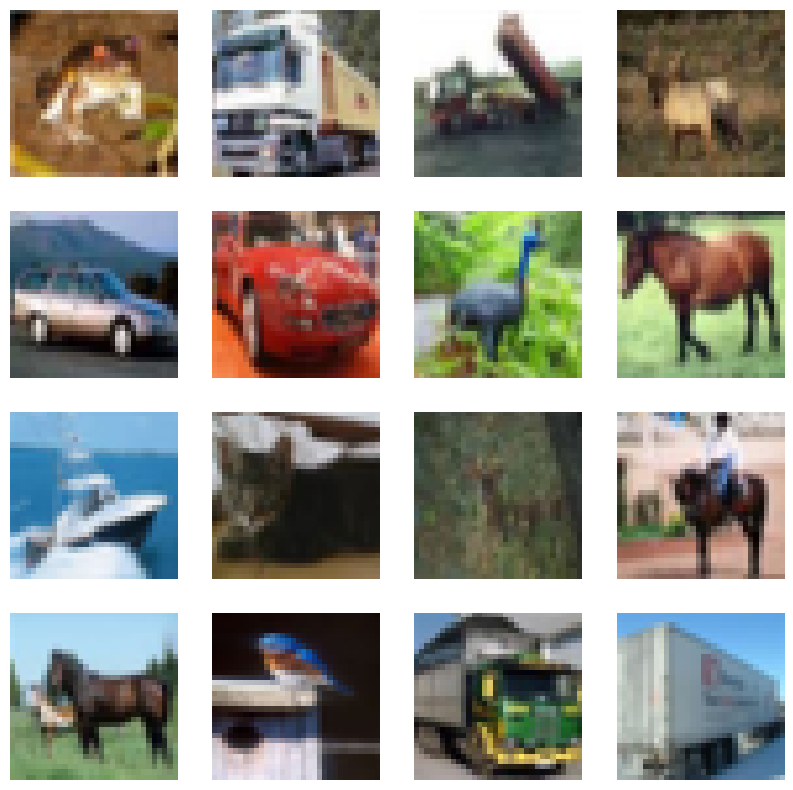

In [1]:
# Install required libraries
!pip install tensorflow==2.16.2 matplotlib==3.9.1 scipy

# Import necessary libraries
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load CIFAR-10 dataset for training images
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Normalize the pixel values for augmentation
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Display a sample of the training images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_train[i])
    plt.axis('off')
plt.show()


### **Create sample.jpg for the Lab**


In [2]:
from PIL import Image, ImageDraw

# Create a blank white image
image = Image.new('RGB', (224, 224), color = (255, 255, 255))

# Draw a red square
draw = ImageDraw.Draw(image)
draw.rectangle([(50, 50), (174, 174)], fill=(255, 0, 0))

# Save the image
image.save('sample.jpg')


In [3]:
import numpy as np 
import matplotlib.pyplot as plt 
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array 

# Load a sample image 
img_path = 'sample.jpg' 
img = load_img(img_path) 
x = img_to_array(img) 
x = np.expand_dims(x, axis=0) 

In the code: 
- `!pip install tensorflow==2.16.2 matplotlib==3.9.1` installs the specified versions of `TensorFlow and Matplotlib`.  

- `tensorflow` is the main library for machine learning in Python.  

- `Model` is used to create a model with the Functional API. 

- `Input` and ‘Dense’ are types of layers that you will use in your model.  


#### Step 2: Basic data augmentation 

Apply basic augmentations such as rotation, width shift, height shift, shear, zoom, and horizontal flip using the ImageDataGenerator as follows:


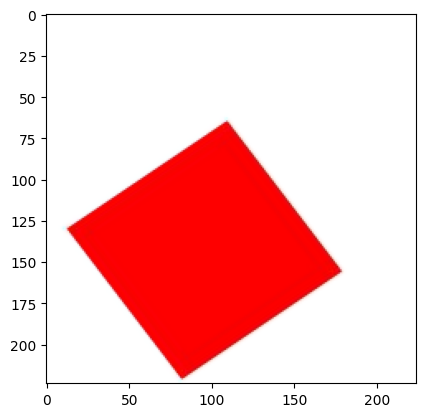

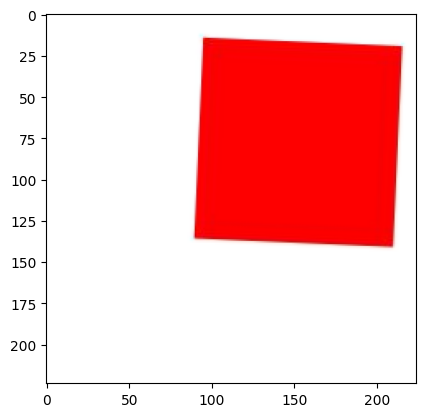

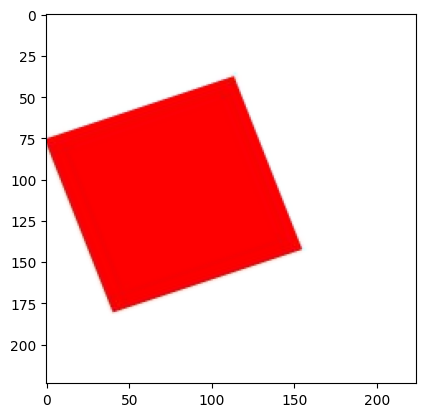

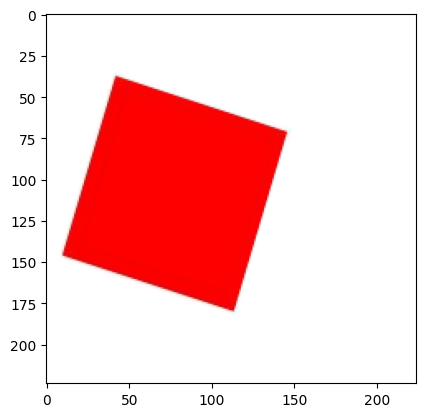

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

# Load the sample image
img_path = 'sample.jpg'
img = load_img(img_path)
x = img_to_array(img)
x = np.expand_dims(x, axis=0)

# Create an instance of ImageDataGenerator with basic augmentations
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Generate batches of augmented images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()



#### Step 3: Feature-wise and sample-wise normalization 

Implement feature-wise and sample-wise normalization on the data set as follows:    


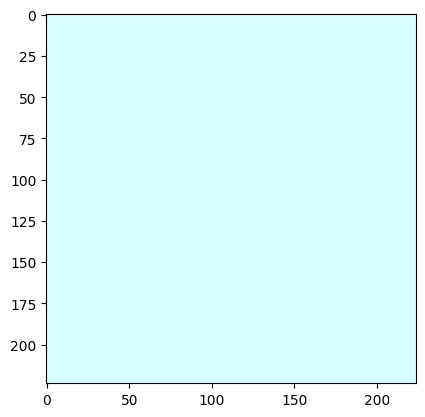

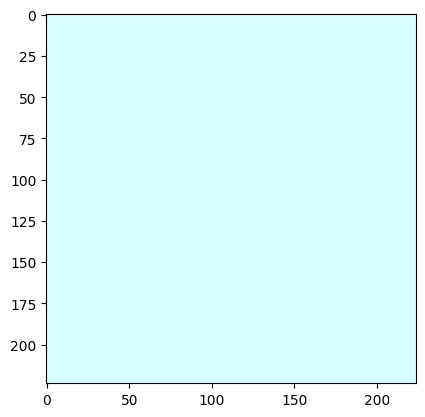

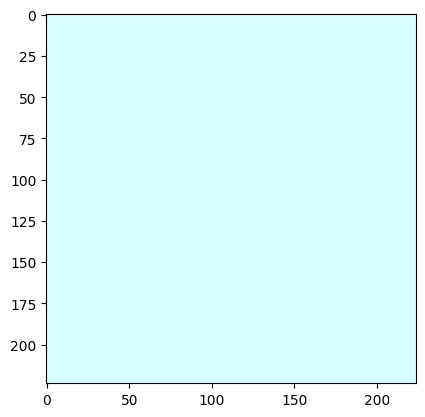

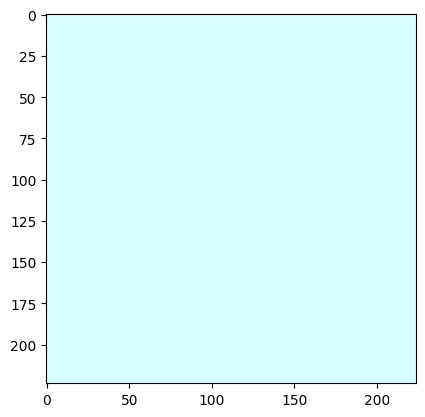

In [5]:
# Create an instance of ImageDataGenerator with normalization options
datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    samplewise_center=True,
    samplewise_std_normalization=True
)

# Load the sample image again and fit the generator (normally done on the training set)
datagen.fit(x)

# Generate batches of normalized images
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()




#### Step 4: Custom data augmentation function 

Next, you define and apply a custom augmentation function that adds random noise to images as follows: 


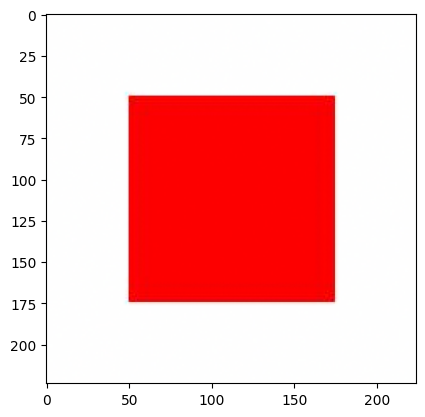

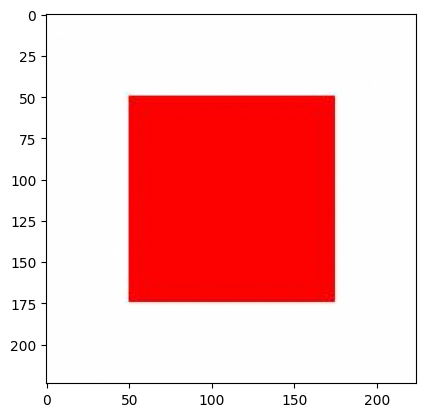

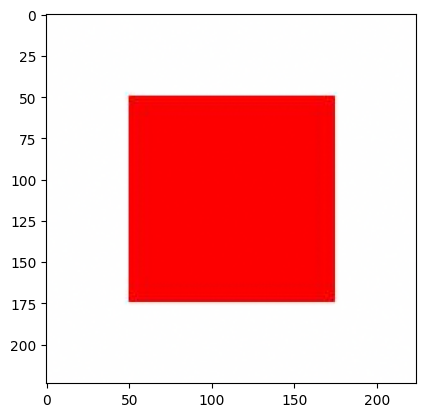

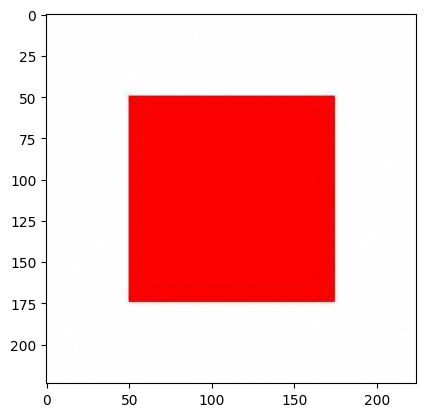

In [6]:
# Define a custom data augmentation function
def add_random_noise(image):
    noise = np.random.normal(0, 0.1, image.shape)
    return image + noise

# Create an instance of ImageDataGenerator with the custom augmentation
datagen = ImageDataGenerator(preprocessing_function=add_random_noise)

# Generate batches of augmented images with noise
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0].astype('uint8'))
    i += 1
    if i % 4 == 0:
        break

plt.show()

#### Step 5: Visualize augmented images 

Visualize the augmented images to understand the impact of each augmentation technique. 


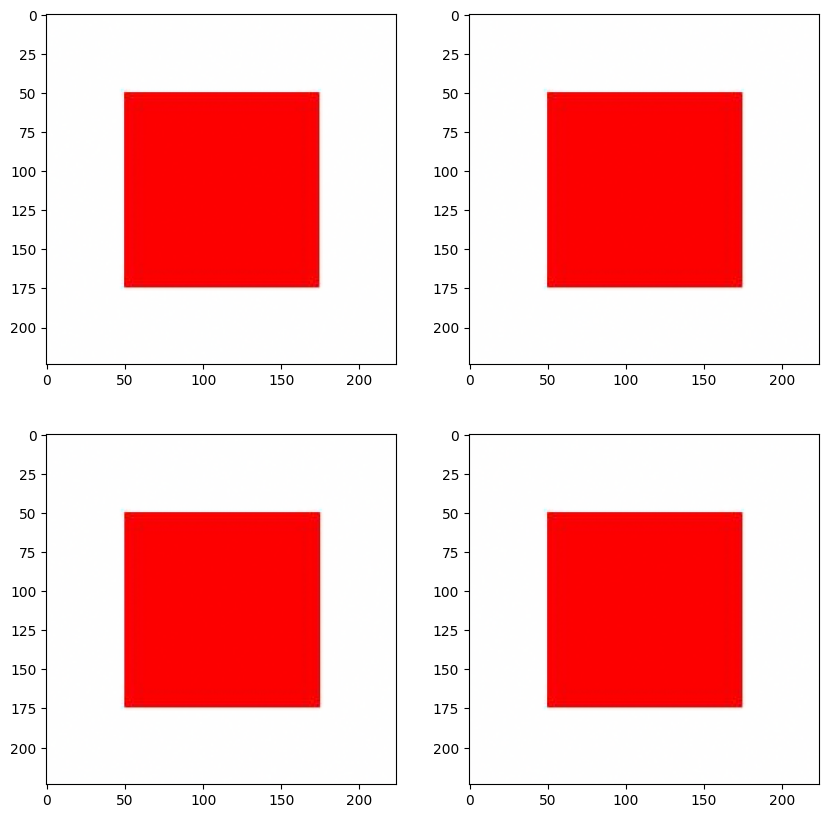

In [7]:
# Visualizing multiple augmented versions of the same image
plt.figure(figsize=(10, 10))
for i, batch in enumerate(datagen.flow(x, batch_size=1)):
    if i >= 4:  # Show only 4 versions
        break
    plt.subplot(2, 2, i+1)
    plt.imshow(batch[0].astype('uint8'))
plt.show()


## Practice Exercises:


### Exercise 1: Apply and Visualize Different Augmentation Techniques 

  

Objective: Experiment with different augmentation techniques and visualize their effects. 


Download the `sample_images` folder containing a collection of images that will be used for this practice exercise.


In [8]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip

--2025-09-28 14:07:57--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/RgP3JFNtPTZA34UmG3KZaA/sample-images.zip
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 14868 (15K) [application/zip]
Saving to: ‘sample-images.zip’

sample-images.zip   100%[===================>]  14.52K  --.-KB/s    in 0s      

2025-09-28 14:07:57 (896 MB/s) - ‘sample-images.zip’ saved [14868/14868]



Extract the images by unzipping the folder


In [9]:
!unzip sample-images.zip 

Archive:  sample-images.zip
   creating: sample_images/
  inflating: sample_images/training_images1.jpg  
  inflating: sample_images/training_images2.jpg  
  inflating: sample_images/training_images3.jpg  


### Instructions: 

1. Create an instance of `ImageDataGenerator` with various augmentations such as rotation, width shift, height shift, shear, zoom, and horizontal flip. 

2. Generate and visualize augmented images. 


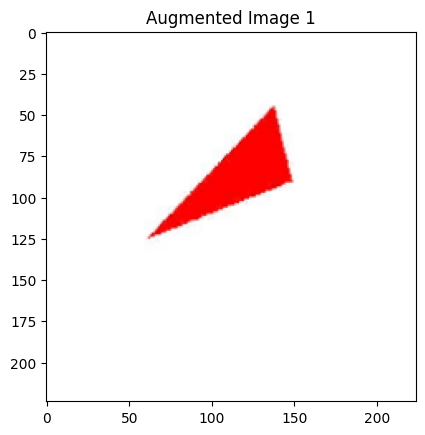

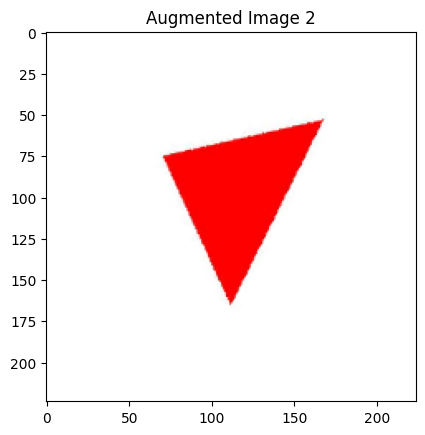

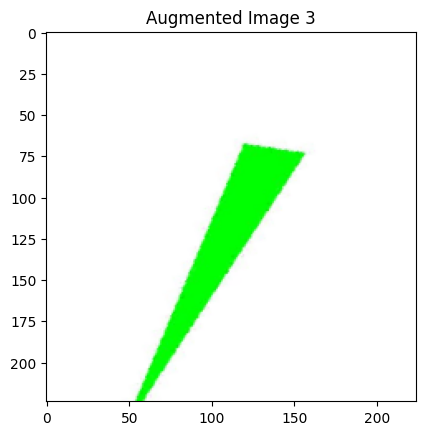

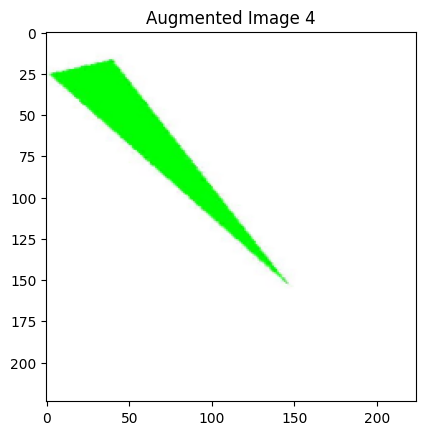

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img  
import matplotlib.pyplot as plt  
import numpy as np  

# Define the augmentation parameters  
datagen = ImageDataGenerator(  
    rotation_range=40,  
    width_shift_range=0.2,  
    height_shift_range=0.2,  
    shear_range=0.2,  
    zoom_range=0.2,  
    horizontal_flip=True,  
    fill_mode='nearest'  
)

# Load and preprocess the dataset  
image_paths = [ 
    'sample_images/training_images1.jpg',  
    'sample_images/training_images2.jpg',  
    'sample_images/training_images3.jpg'  
]

training_images = []  
for image_path in image_paths:  
    img = load_img(image_path, target_size=(224, 224))  
    img_array = img_to_array(img)  
    training_images.append(img_array)  
training_images = np.array(training_images)  

# Generate and visualize augmented images  
i = 0  
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Augmented Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  
plt.show()   

### Exercise 2: Implement Feature-wise and Sample-wise Normalization
 
Objective: Apply feature-wise and sample-wise normalization to the dataset.
 
Instructions:
1. Create an instance of `ImageDataGenerator` with feature-wise and sample-wise normalization.
2. Fit the `ImageDataGenerator` to the data set and visualize the normalized images.


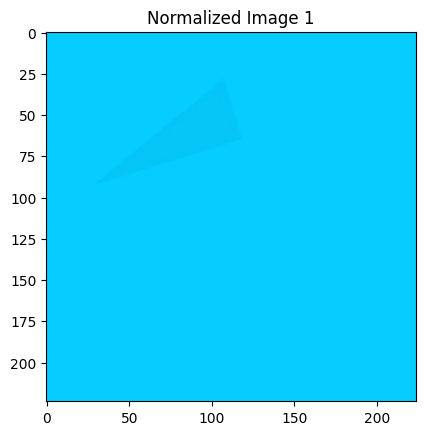

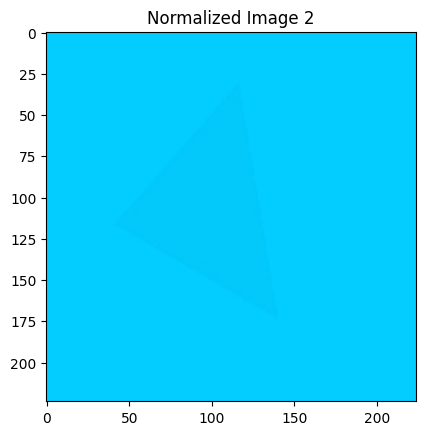

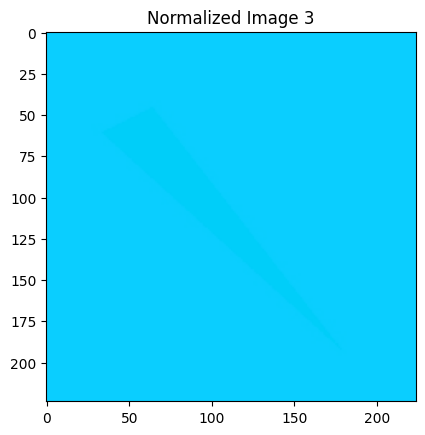

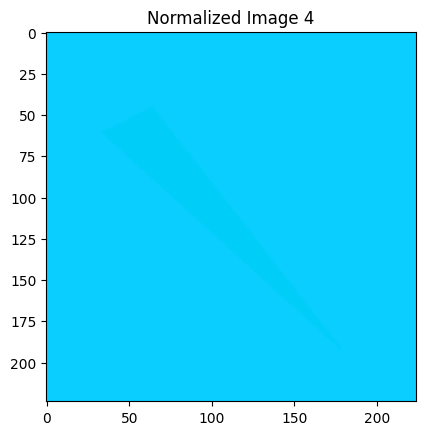

In [15]:
# Create an instance of ImageDataGenerator with normalization options  
datagen = ImageDataGenerator(  
    featurewise_center=True,  
    featurewise_std_normalization=True,  
    samplewise_center=True,  
    samplewise_std_normalization=True  
)

# Fit the ImageDataGenerator to the dataset  
datagen.fit(training_images)  


# Generate and visualize normalized images  
i = 0  
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Normalized Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  

### Exercise 3: Create and Apply a Custom Data Augmentation Function
 
Objective: Define a custom data augmentation function that adds random noise to images and apply it.
 
Instructions:
1. Define a function that adds random noise to an image.
2. Create an instance of `ImageDataGenerator` with the custom augmentation function.
3. Generate and visualize augmented images.


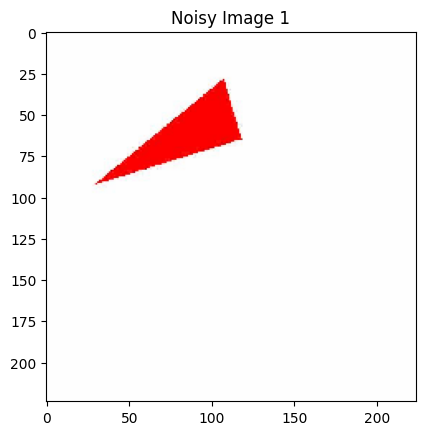

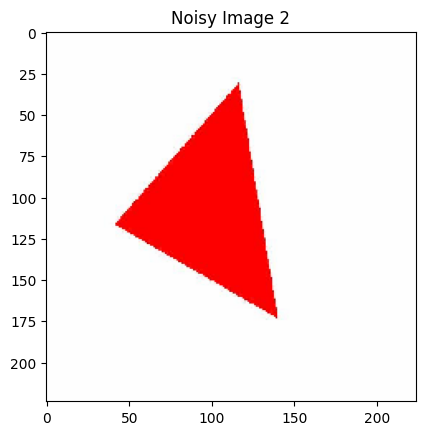

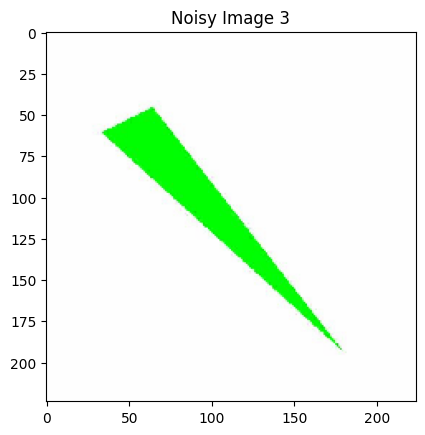

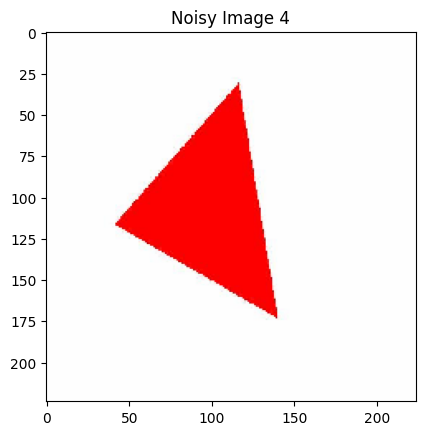

In [16]:
# Define a custom augmentation function to add random noise  

def add_random_noise(image):  
    noise = np.random.normal(0, 0.1, image.shape)  
    return image + noise
 

# Create an instance of ImageDataGenerator with custom augmentation  
datagen = ImageDataGenerator(preprocessing_function=add_random_noise) 
 

# Generate and visualize augmented images  
i = 0  
for batch in datagen.flow(training_images, batch_size=1):  
    plt.figure(i)  
    imgplot = plt.imshow(array_to_img(batch[0]))  
    plt.title(f'Noisy Image {i + 1}')  
    i += 1  
    if i % 4 == 0:  
        break  

plt.show()  

## **Conclusion**
Congratulations! You have successfully implemented and experimented with various data augmentation techniques using Keras. This lab exercise demonstrated how to use Keras to enhance your datasets through augmentation and normalization techniques. 


## Authors


Copyright © IBM Corporation. All rights reserved.
